In [53]:
import tensorflow as tf

In [5]:
from tensorflow.examples.tutorials.mnist import input_data

#AttributeError: module 'pandas' has no attribute 'computation' error resolved by upgrading "dask" package

In [6]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [10]:
#The MNIST data is split into three parts: 
#55,000 data points of training data (mnist.train), 
#10,000 points of test data (mnist.test), and 
#5,000 points of validation data (mnist.validation). 
#This split is very important: it's essential in machine learning that we have separate data 
#which we don't learn from so that we can make sure that what we've learned actually generalizes!

In [15]:
mnist.train.images.shape

(55000, 784)

In [17]:
mnist.train.labels.shape

(55000, 10)

In [18]:
mnist.test.images.shape

(10000, 784)

In [19]:
mnist.test.labels.shape

(10000, 10)

In [20]:
#Image data is the form of an array
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [25]:
sample = mnist.train.images[100].reshape(28,28)

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

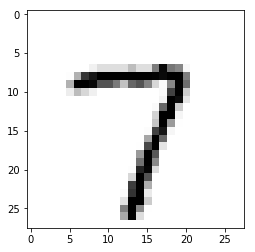

In [27]:
plt.imshow(sample, cmap='Greys')

In [28]:
#Find some parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [29]:
mnist.train.num_examples

55000

In [30]:
n_classes = 10
n_samples = mnist.train.num_examples

In [31]:
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256

In [32]:
def multilayer_perceptron(x,weights,biases):
    '''
    x: Placeholder for Data Input
    weights: Dict of weights
    biases: Dict of bias values
    '''
    # First Hidden Layer with RELU Activation
    # X * W + b
    layer_1 = tf.add(tf.matmul(x,weights['h1']), bias['b1'])
    # RELU(X * W * b) -> f(x) = max(0,x)
    layer_1 = tf.nn.relu(layer_1)
    
    # Second hidden layer
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), bias['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    
    return out_layer

In [34]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

In [35]:
weights

{'h1': <tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>,
 'h2': <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 'out': <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>}

In [40]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes])) 
    
}

In [41]:
bias

{'b1': <tf.Variable 'Variable_3:0' shape=(256,) dtype=float32_ref>,
 'b2': <tf.Variable 'Variable_4:0' shape=(256,) dtype=float32_ref>,
 'out': <tf.Variable 'Variable_5:0' shape=(10,) dtype=float32_ref>}

In [48]:
x = tf.placeholder('float',[None, n_input])

In [49]:
y = tf.placeholder('float',[None, n_classes])

In [50]:
pred = multilayer_perceptron(x, weights, biases)

In [51]:
pred

<tf.Tensor 'add_1:0' shape=(?, 10) dtype=float32>

In [60]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=pred))

In [61]:
cost

<tf.Tensor 'Mean_1:0' shape=() dtype=float32>

In [63]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [64]:
optimizer

<tf.Operation 'Adam_1' type=NoOp>

Training the Model

In [65]:
mnist.train.next_batch(10)

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32),
 array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]]))

In [72]:
t = mnist.train.next_batch(1)

In [73]:
len(t[1])

1

In [74]:
Xsamp, ysamp = t

In [75]:
Xsamp

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.22352943,  0.94901967,  0.5

In [76]:
Xsamp.reshape(28,28)

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.22352943,  0.9490

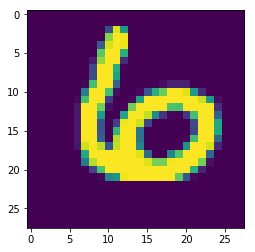

In [77]:
plt.imshow(Xsamp.reshape(28,28))

In [78]:
ysamp

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.]])

Run the session

In [79]:
sess = tf.InteractiveSession()

In [80]:
sess

In [89]:
init = tf.global_variables_initializer()

In [84]:
init

<tf.Operation 'init_1' type=NoOp>

In [90]:
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [91]:
sess.run(init)

In [94]:
# 15 loops
for epoch in range(training_epochs):
    # Cost
    avg_cost = 0.0
    total_batch = int(n_samples/batch_size)
    
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        _, c = sess.run([optimizer, cost], feed_dict = {x:batch_x,y: batch_y})
        avg_cost += c/total_batch
        
    print("Epoch:{} cost {:.4f}".format(epoch+1, avg_cost))
print("Model has completed {} Epochs of training".format(training_epochs))


Epoch:1 cost 0.7184
Epoch:2 cost 0.6253
Epoch:3 cost 0.5345
Epoch:4 cost 0.5097
Epoch:5 cost 0.4239
Epoch:6 cost 0.3549
Epoch:7 cost 0.3827
Epoch:8 cost 0.3795
Epoch:9 cost 0.3509
Epoch:10 cost 0.3209
Epoch:11 cost 0.2037
Epoch:12 cost 0.3680
Epoch:13 cost 0.2900
Epoch:14 cost 0.2472
Epoch:15 cost 0.3561
Model has completed 15 Epochs of training


# Model Evaluation

In [95]:
correct_predictions = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))

In [96]:
correct_predictions

<tf.Tensor 'Equal:0' shape=(?,) dtype=bool>

In [98]:
print(correct_predictions[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


In [99]:
correct_predictions = tf.cast(correct_predictions, 'float')

In [100]:
print(correct_predictions[0])

Tensor("strided_slice_1:0", shape=(), dtype=float32)


In [101]:
accuracy = tf.reduce_mean(correct_predictions)

In [102]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [104]:
mnist.test.labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [105]:
accuracy.eval({x:mnist.test.images, y:mnist.test.labels})

0.9576